
iterazione: 1
w0: 0 b0: 0
loss:14.956521739130435
w_grad: -34.52173913043478 b_grad:-5.913043478260869 

iterazione: 2
w0: 0.034521739130434784 b0: 0.005913043478260869
loss:13.75914020580258
w_grad: -32.867047258979206 b_grad:-5.652060491493384 

iterazione: 3
w0: 0.067388786389414 b0: 0.011565103969754253
loss:12.673545638993758
w_grad: -31.291505919947404 b_grad:-5.403542029423852 

iterazione: 4
w0: 0.0986802923093614 b0: 0.016968645999178106
loss:11.68929979912964
w_grad: -29.79132916625575 b_grad:-5.166891902638427 

iterazione: 5
w0: 0.12847162147561714 b0: 0.02213553790181653
loss:10.796939132756691
w_grad: -28.36291214102112 b_grad:-4.941542438763651 

iterazione: 6
w0: 0.15683453361663827 b0: 0.027077080340580182
loss:9.98788375977273
w_grad: -27.002822415617135 b_grad:-4.726953118433537 

iterazione: 7
w0: 0.1838373560322554 b0: 0.03180403345901372
loss:9.254354959110483
w_grad: -25.707791742050496 b_grad:-4.522609276501347 

iterazione: 8
w0: 0.20954514777430588 b0: 0.0363

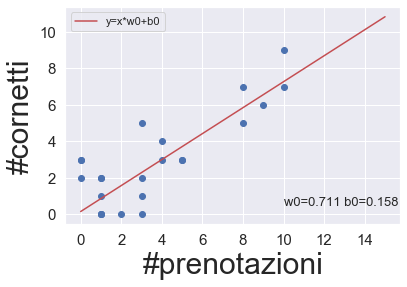

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def prediction(X,w,b): 
    return X*w+b

def loss(X,Y,w,b):
    error=prediction(X,w,b) - Y
    squared_error = error**2
    return np.average(squared_error)

def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (prediction(X, w, b) - Y))
    b_gradient = 2 * np.average(prediction(X, w, b) - Y)
    return (w_gradient, b_gradient)


def training(X,Y,iteration,learning_rate):
    w,b=0,0
    for i in range(iteration):
        current_loss = loss(X,Y,w,b)
        w_gradient,b_gradient=gradient(X,Y,w,b)
        print(f"\niterazione: {i+1}")
        print(f"w0: {w} b0: {b:}")
        print(f"loss:{current_loss}")
        print(f"w_grad: {w_gradient} b_grad:{b_gradient} ")
        w-=w_gradient*learning_rate
        b-=b_gradient*learning_rate
    return w,b
        
# carico il training set 
X,Y = np.loadtxt("training_set_cornetti.txt",skiprows=1,unpack=True)

# avvio il training
w0,b0 = training(X,Y,100,0.001)
print(f"\nRISULTATO DEL TRAINING:")
print(f"w0:{w0} + b0:{b0}")

# disegno il training set 
#plt.figure(figsize=(10,10))
plt.xlabel("#prenotazioni",fontsize=30)
plt.ylabel("#cornetti",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(X, Y, "bo")

# disegno la linea che meglio approssima i dati di predizione 
axis_x=[0,15]
axis_y=[prediction(axis_x[0],w0,b0),prediction(axis_x[1],w0,b0)]
plt.plot(axis_x, axis_y, '-r', label=f"y=x*w0+b0")
plt.text(10,0.5,f"w0={w0:2.3} b0={b0:2.3}",fontsize=13)
plt.legend(loc='upper left')
plt.show()
